In [2]:
import pandas as pd 
import numpy as np
import re, nltk
from numpy import array
from keras.preprocessing.text import one_hot 
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [9]:
import pandas as pd
df1 = pd.read_csv(r'Alllanguages.csv', encoding ="utf-8")
df = df1.sample(frac =1)
display(df)

,sentence,AMH,Tigrinya,Lithaunian,Arabic,czech,Germany,French,Labels
2921,Why condoms are bad for you on Valentines Day,ኮንዶም በቫላንታይንስ ቀን ለምን መጥፎ ሆነሃል?,ኣብ መዓልቲ ቫለንቲነስ ፡ ኮንዶም ሕማቕ ዝዀነካ ስለምንታይ እዩ ?,Kodėl prezervatyvai jums kenkia Valentino dieną,لماذا الواقي الذكري سيء بالنسبة لك في يوم عيد ...,Proč jsou kondomy pro vás špatné na Valentýna,Warum Kondome am Valentinstag schlecht für Sie...,Pourquoi les préservatifs sont mauvais pour vo...,1
6658,Fans can find Base Series 2 in The Armory pack...,አድናቂዎቹ በቴክስጊንግ መደብር ውስጥ በሚገኘው የአርማሪ ጥቅልሎች ላይ ቤ...,ደገፍቲ ፡ ባስ 2 ኣብ ኣርማጌን ኣብ ዝርከብ ሳንዱቕ ሓጐስ ዝመልኦ ምልላ...,Ventiliatoriai gali rasti „Base 2“ seriją „Arm...,يمكن للمشجعين العثور على سلسلة قاعدة 2 في حزم ...,Fanoušci mohou najít základní sérii 2 v balíčc...,Fans finden die Basisreihe 2 in den Armory Pac...,Les fans peuvent trouver la série de base 2 da...,2
5723,So what do you want for ChristmasI dunno minim...,ስለዚህ ለገናይ ዶኖ የምትፈልገው አነስተኛ ደሞዝ ጥሩመርባዘርባዘር እንዲሆ...,ስለዚ ፡ ኣብ በዓል ልደት ዳኖ ዝወሓደ መጠን ደሞዝ እንታይ እዩ ዝደሊ ፡...,"Taigi, ko jūs norite „Minimal Minimum“, „NiceG...",إذن ما الذي تريده لعيد الميلاد ، سيكون الحد ال...,Co tedy chcete na Vánoce Dunno minimální mzda ...,"Also, was willst du für Heilig -I -Dunno Minde...","Alors, que voulez-vous pour Christmasi Dunno M...",2
5988,Bob Dylans Sara the kind of melody that stands...,ቦብ ዲለንስ ሳራ በፊቱ ላይ የሚቆም እና የሚያሸማቅቅ ዜማ,ቦብ ዲላንስ ሳራ ፡ እቲ ኣዝዩ ባህ ዘብል ዜማታት ኣብ ገጹ ተንጠልጢሉ ዝ...,Bobas Dylans,بوب ديلانز سارة نوع اللحن الذي يقف ويصفعك في و...,"Bob Dylans Sara ten druh melodie, která vstane...","Bob Dylans Sara die Art von Melodie, die aufst...",Bob Dylans Sara le genre de mélodie qui se lèv...,2
4130,In other news Trump waves goodbye to Petro Por...,በሌላ ዜና ደግሞ ትራምፕ የዩክሬኑን ፕሬዚዳንት ፔትሮ ፖሮሼንኮን በደስታ ...,ኣብ ካልእ ዜና ትራምፕ ንፔትሮ ፖሮሸንኮ ፕረዚደንት ዩክረይን ተሰናቢቱሉ,Kitose naujienose Trumpas atsisveikina su Petr...,في أخبار أخرى ، وداعًا لترامب بترو بوروشينكو ر...,V jiných zprávách Trump vlny sbohem Petro Poro...,In anderen Nachrichten verabschiedet sich Trum...,"Dans d'autres nouvelles, Trump agit au revoir ...",1
...,...,...,...,...,...,...,...,...,...
1899,a common sense thing to do is to read the inst...,የተለመደ የማስተዋል ነገር ቢኖር ነፋስ አንድ ዲናር ከመፍጠሩ በፊት ጋይድ...,ሓደ ልሙድ ነገር ፡ ንፋስ ከይነፈሰ ከሎ ጌይደል ነቲ መምርሒ ቅድሚ ምንባ...,"Sveikas protas, kurį reikia padaryti",الشيء السليم الذي يجب القيام به هو قراءة التعل...,Zdravý rozumný rozum je přečíst pokyny GaideLines,"Eine gesunde Menschenverstand ist es, die Anwe...",Une chose de bon sens à faire est de lire les ...,0
5693,Studs Terkel to Bob Dylan in 1963 on radio abo...,ስቱዲዮዎች ወደ ቦብ ዲለን በ1963 በሬዲዮ ስለ ሃር ዲን ፖዮናዶል ሲሰብ...,ብ1963 ኣብ ሬድዮ ብዛዕባ ሃርድ ረይን ጎና ፎል ዘርእስታ መዝሙር ፡ ና...,1963 m. Per radiją per radiją apie dainą apie ...,ترصيع Terkel إلى Bob Dylan في عام 1963 على الر...,Curts Terkel k Bobovi Dylanovi v roce 1963 v r...,Studs terkel an Bob Dylan im Jahr 1963 im Radi...,Studs Terkel à Bob Dylan en 1963 sur la radio ...,2
5879,Meet George Soros I would LOVE to hear your th...,ከጆርጅ ሶሮስ ጋር ተዋወቅ በዚህ ክሊፕ ላይ ያለህን ሐሳብ መስማት በጣም ...,ብዛዕባ እዛ ክሊፕ እዚኣ ዘሎካ ሓሳባት ክሰምዕ ምስ ጆርጅ ሶሮስ እራኸብ ...,"Susipažink su George'u Sorosu, norėčiau išgirs...",قابل جورج سوروس ، أحب أن أسمع أفكارك حول هذا ا...,"Seznamte se s Georgem Sorosem, rád bych slyšel...",Treffen Sie George Soros Ich würde gerne Ihre ...,"Rencontrez George Soros, j'aimerais entendre v...",2
1278,Im sorry Jill but this sounds like noise Thank...,ይቅርታ አድርጊ ጂል ይሁን እንጂ ይህ ድምፅ ምስጋና ዩባማ የሚል ይመስላል,ይቕሬታ ንጂል ቅዳሕ ፡ እዚ ድምጺ ግን ናይ ምስጋና ድምጽታት ይመስል,"Atsiprašau, Jill, bet tai skamba kaip triukšma...",أنا آسف جيل ولكن هذا يبدو وكأنه ضجيج شكر,"Omlouvám se Jill, ale to zní jako hluk, děkuji","Es tut mir leid, Jill, aber das klingt nach Lä...",Je suis désolé Jill mais ça ressemble à du bru...,0


In [10]:
sentence = df.AMH.values.tolist()
sentiment = df.Labels.values.tolist()

In [11]:
sentence_a = np.array(sentence)
sentiment_a =np.array(sentiment)

In [12]:
print(len(sentence_a))
print(len(sentiment_a))
print(sentiment_a[0:10])

7036
7036
[1 2 2 2 1 2 2 0 1 2]


In [13]:
Comm = []
for el in sentence_a:
    sent= re.sub(r'[A-Z]+', '', el)
    sent1 = re.sub(r'[a-z]+', '',sent)
    sent2= re.sub(r'[^\w]', ' ', sent1)
    
    Comm.append(sent2)

In [14]:
print(len(sentence_a))
print(sentence_a[0:10])

7036
['ኮንዶም በቫላንታይንስ ቀን ለምን መጥፎ ሆነሃል?'
 'አድናቂዎቹ በቴክስጊንግ መደብር ውስጥ በሚገኘው የአርማሪ ጥቅልሎች ላይ ቤዝ ተከታታይ 2ን ማግኘት ይችላሉ'
 'ስለዚህ ለገናይ ዶኖ የምትፈልገው አነስተኛ ደሞዝ ጥሩመርባዘርባዘር እንዲሆን ነው'
 'ቦብ ዲለንስ ሳራ በፊቱ ላይ የሚቆም እና የሚያሸማቅቅ ዜማ'
 'በሌላ ዜና ደግሞ ትራምፕ የዩክሬኑን ፕሬዚዳንት ፔትሮ ፖሮሼንኮን በደስታ ተቀብለውታል'
 'ስፐርስ አሁንም ቢሆን ቲም ዶንሰን ባይኖር እውነተኛ የዲሲፕሊን ቡድን ነው'
 'በሁሉም እውነታው ሲታይ ፣ ግሬሰን አለን እውነተኛ ሕይወት ያለው ሰው በመሆኑ በጣም አመስጋኝ ነው'
 'ስለ አለቆቹ አስተያየት መስጠት የሚችሉት እነዚህ ጣዖታት ሙሉ በሙሉ ችላ ባይባሉ ነው'
 'በጣም ብዙ ደም ስለጠፋን የላይሞ ማስቲካዎችዎን ይውጡ'
 'ይህ በእርግጥም አዲስ ምንጭ ቅጠልን የቀየረ ሌላ አዲስ ምዕራፍ ነው']


In [15]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
y = np.array(sentiment_a)
label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(y)

In [16]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(vec)
print(y[1])
print(y[20])


[0. 0. 1.]
[0. 1. 0.]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(sentence_a, y , test_size = 0.20, random_state = 42, shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state = 1, shuffle = True)
print(len(X_train))
print(len(X_val))
print(len(X_test))


4502
1126
1408


In [18]:
tokenizer = Tokenizer(num_words = 100000, filters ='!"#$%&()*+,-./;<=>?@][\\]^{|}~\t\n')
tokenizer.fit_on_texts(X_train)
index_of_words = tokenizer.word_index
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(X_val)

In [19]:
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding = 'post', maxlen = maxlen)
X_test = pad_sequences(X_test, padding = 'post', maxlen = maxlen)
X_val = pad_sequences(X_val, padding = 'post', maxlen = maxlen)

In [20]:
from numpy import array
from numpy import asarray
from numpy import zeros
import pickle 
with open ("C:/Users/senug/Documents/Project 1 PHD/EmbeddingAmh.pkl", 'rb') as f:
    embeddings_index = pickle.load(f)
    print('Total %s word vectors.' % len(embeddings_index))

Total 41042 word vectors.


In [21]:
for a in embeddings_index:
    print(a)

ሁሉም
ሰው
ወደ
ውጭ
እየሄደ
ነው
ምናልባት
ትንሽ
መያዝ
እችል
ይሆናል
ሙሉ
በሙሉ
ተደስቻለሁ
ሞተርሳይክል
ለማግኘት
እየፈለጉ
እና
ከዚያ
አስደናቂ
የመንገድ
ጉዞ
መሄድ
እችላለሁ
እኔ
ብዙ
አልለጥፍም
ግን
ሁሉንም
ተመሳሳይ
እንኳን
ደህና
መጡ
236
38
ትዊተር
በደህና
ግሩም
ጅምር
ማግኘት
አስደሳች
ሰዎችን
መከተል
በቁልፍ
ቃላት
እወዳለሁ
ይደሰቱ
ኦህ
ቢቲ
የእኔ
ወንዝ
እንዴት
እንደሚወጣ
ደስታ
ለማንኛውም
መልካም
ምሽት
እዚህ
እኩለ
ሌሊት
አይደለም
የሰዓት
ሰቅዎን
አላውቅም
አልረሳውም
ነገ
ውስጥ
መተኛት
ስለዚህ
እተኛለሁ
ለማጋራት
ነኝ
ትዊቶች
ፊልም
ይህን
ያከናወነው
ለተወሰነ
ጊዜ
ጁንክፉድ
አስፈሪ
ፍሊክስ
መብራት
ታች
ምቹ
ሶፋ
በዝናብ
ዓርብ
ተጨማሪ
መጠየቅ
አይችሉም
91
ሄይ
ወንዶች
ሁኑ
እስከ
አዲሱ
አልበም
ድረስ
ብዙም
ሳይቆይ
እወዳችኋለሁ
ፊደል
ያንን
ስህተት
አጻፈ
ለ
አመሰግናለሁ
00
አዎ
ሊያሳዩኝ
ይገባል
ኮፍያዬን
ለእርስዎ
ይጠቁማል
07
ዋው
ቅባት
በእርግጥ
አሰልቺ
ነዎት
አዎን
አንድ
እርምጃ
ስወስድ
ላለማድረግም
ወሰንኩ
እኛ
2
ልንሰለቸን
እንደምንችል
ገምቱ
ንጋይ
ብሠራ
ደስ
ይለኛል
መውረድ
ለአሊ
እያወራ
ካፕ
ሄጄ
ላ
ከመዛወሩ
በፊት
7
ዓመታት
በሲኤስ
አውቶቡስ
ኖሬያለሁ
ንቅሳት
ቀናት
ተዛወረ
ከስልክዎ
እንዲጽፍ
ሁል
መጥፎ
ሀሳብ
ምንም
በኋላ
ላይ
ለማብራራት
ቢያስቡም
በቁም
ነገር
እርግማን
ምርጫዬ
ሂደት
እያዘገመ
የእኔን
መመዘኛዎች
ለመቀነስ
ይህንን
ለማፋጠን
ሌላ
መጠጥ
እፈልጋለሁ
110
ጥሩ
ፍሬኖች
እንደሆንክ
አያለሁ
ሙራይ
የምወድ
ይመስለኛል
23
እስካሁን
እንደሚከተሉ
እርግጠኛ
ፊዮና
ፈላፌል
በወደቀችበት
ቁራጭ
እየተጫወተች
ወለሉ
ዙሪያ
እየደበደበችው
እሷ
እንግዳ
ነች
የአካባቢያችን
ቤት
የሚበር
አሳማ
ይባላል
እደሩ
ሀያዎቹ
በደንብ
ተኙ
አዲስ
ስልክ
አገኘሁ
እወ
እሺ
4
ጣፋጭ

እንዲኖር
ያመራሉ
ተሸናፊ
ቆየ
በዚያ
ሹካ
ፀጉርዎን
ሰማያዊው
የባሕር
ሊዎችን
ከቤተሰብ
ከጄስቲን
ከሳይር
የዓሳ
አይን
በልቷል
ይጎብኙን
የወጣት
ሴልቲኮች
ከተሸነፉ
ሕይወቴን
የትኛው
ያሳዝናል
ለእነሱ
ሥር
የበሬዎችን
አጥንት
ይሰብሩ
ደክሞ
እያመራ
አካባቢ
እሳት
ፎቶዎችን
አግኝቷል
ያካፍላል
ተወዳጆች
በጭንቅላትህ
የተሻሻሉ
የሱቅ
ሥዕሎች
ዝርዝሮች
የምትፈልገውን
ፍረድልኝ
በማደግ
ያለኝ
አካል
50
ለጂኦፒ
መሠረቱን
እንደሚገነባ
ልጆችን
ይስጡን
የውስጥ
በደረሰበት
በፀሐይ
ተቃጠሉህ
የሚወዱ
20
ቤትዎ
ያለፈ
ጓደኛዎችን
ማቲው
ማካውኒ
የሆሊውድ
የፊልም
አማራጭን
ከግምት
በማስገባት
ምስጢር
ሐ
በብሎክበስተር
እምቅ
ተመለከትክ
ኪቲ
ፋንደር
ይገዛልኛል
እነግራችኋለሁ
የሆነ
ከያዙ
ክሊፕ
ተቺዎች
ለቪዲዮዎቼ
ምላሽ
ሰጡ
በግል
ቪዲዮቸው
ተጠቁሞ
ሰማሁ
ለሁለት
እጠይቃለሁ
መልሱን
አላገኘሁም
መጫወቻዬን
እስኪሞላ
እየጠበቀ
እጫወታለሁ
ገምቼ
እኔንም
መቼም
አያረጅም
እናም
ያስለቅሰኛል
ኮላቾቹን
ሊን
ጥቂቶች
የሚመጡትን
አጠናቀቁ
ድርቆሹን
ጠፍተዋል
ሳንካዎች
ፍቅሬ
በእጥፍ
እናረጋግጣለን
ፈቃደኛ
ስፖንሰሮች
ሊያገኙኝ
ከልብ
ለሚሰጡት
እንድገዛ
ተነግሮኝ
ሲጫወት
አየሁት
የሥራ
ዝርዝር
የምለው
በበለጠ
በተጨማሪ
ከኋላዬ
ከኒው
ዮኒ
እምም
መጣበቅ
የፌስቡክ
446
ግባ
ናፈቀኝ
ናፍቆኛል
የሃዋይ
24
ሰአታት
አስገባኝ
ኮና
መስመሮች
ነበሩት
የሚጣበቅልኝ
እለተ
እንደነበረዎት
ለእሱ
እንድሰጥ
ለመለጠፍ
ቁጭ
እየጠበቅኩ
አይፈለጌ
ገጽ
በጎርፍ
ተጥለቅልቋል
ሙዝ
የልጆች
ዲስኮ
ለመሥራት
ካሊፎርኒያ
ዝናብ
ወደላይ
መውጣትን
ስለፈለግኩ
ፈገግታዎን
ይወድዎታል
የተሰጠኝን
የመጽሐፍ
የቤት
ሥራዬን
አምላካዊ
እንድሆን
ስለረዱኝ
ለባንዳችን
ብቸኛ
ላም
ያካተተ
በአከባቢው
ከሌለ
ምትክ
መምረጥ
ራያን
ፍፃሜዎችን
አይደለሁም
የእብድ
ፖስታ
ካርዶቼን
ለድ

ሙያተኞች
ለሽያጭ
በሚቀርቡበት
አቅርቦቶች
መርከብ
ኤክስኤምኤን
አሸነፈኝ
ፍርሃት
ከመሄድ
አላገደኝም
ወደሆንኩኝ
ሕልውናዬ
ሕልውና
በሞጅቶዎች
ከብርቱር
ብስጭት
የሚሰማን
የተቀሩት
ግቦች
ቢኖሩት
ለኩሽቶች
ድጋፎች
ቺርስ
የግንቦት
ማይግራ
እኛን
ይጠላል
አገናኙ
አላደረጉም
ድምፃዊው
ራስን
ማጥፋት
አኮስቲክ
ዳንግ
አስተውሏል
መፀዳጃ
እያለ
ለሁለቱም
ማይል
ርቀት
እንዳልሰማው
አንጎሌን
አስነጥሶ
የምጠይቀውን
አዕምሮዬን
አንብበዋል
ጭፈራችንን
በወራት
በአልጋዬ
የዶርም
አልጋዎች
አይነፃፀሩም
ወቅት
811
ቶል
ቶንግትን
በአምስተርዳም
ብስኩትን
ሠራሁ
ዘፈኖችዎን
ይበልጣል
ጠቃሚ
ምክር
በካሜራው
ሲስተም
ቢ
ማይዬ
ትሠራለች
ዝርዝርን
በመጻፍ
የጓሮ
አትክልት
ሰፈርን
ለካምፕ
አንቺ
ለማናችንም
እንደሚፈልጉ
ግሬስን
እርሷን
ያለንበት
የምንሄድበት
ከግዙፉ
ፌሪስ
ጎማ
አናት
እያወቀ
መኖሩ
ዝነኞች
መሆናቸውን
እንድገነዘብ
ያደርገኛል
ያልተለመደ
ግንዛቤ
ጓደኞቼን
ሚያ
ሙዚቃህ
እስትንፋስህን
አልጠብቅህም
አልሰማኝም
በነፋስ
የአፈሩን
የበረዶውን
ጣፋጭነት
አልሰማሁም
59
ካልተከተሉ
በመፈጸማቸው
ይደሰታሉ
የደን
ልማት
ስምምነት
በማቀናጀት
መሆኗን
አለመሆኑን
ይጠቡታል
አሌክሳንድር
በጌንት
ለግዢ
ሁኔታው
እንደማይሆን
ቅርጫቶች
በማቀዝቀዣዬ
የሚመስሉበትን
400
አውስትራሊያንን
ክሪስቲና_ኮፐር
ሊያ
እደሪ
ሴተኛ
አዳሪ
በስብሰባ
ዕቅዶች
ፍራቻ
አልማ
እንደወደድኳቸው
መጠቅለያ
ፒተር
ሉዊስ
እንደነበሩ
ተናግረዋል
እንደወደድኩት
ቢሉ
ባርበር
በፖሊስ
ተይ
ይቻላል
አምልጧል
ኩኪዎችዎን
ሞቃት
የታህሳስ
ህፃን
ለበጋው
አይሆኑም
እርግዝና
ጋምበል
ጨምሮ
ሥዕሎቻችን
የሚረብሽ
እየደፋሁ
መታኝ
ሙዚቃን
ኤች
ሙቀት
ማሸነፍ
አጭበርብረዋል
ያለዎትን
ሊልኩልኝ
እስኪጠብቁ
ሳቅኩኝ
ሃሃሃሃሃሃ
ሶልቫንግን
አይጠበቅብንም
ፖል
ተዘዋውረን
የዴንማርክ
ክሮኖ
ሲ

ከልጅ
የባሰ
0405
የፓስታ
ሉክ
በጣሪያዬ
ጠጥቷል
ቶንቴንት
ኤሴክስ
ጂክ
ለሚከተሉኝ
እናድርገው
በአዙካር
ብዳይ
ማርከስ
ዳሮም
ከሄለን
ጮኸ
ያውቁታል
ጎርፍ
አውርጄዋለሁ
የቂጣውን
የማብሰያ
ጣዕምዎን
ለቺዋዋዋ
የማበስለው
ወይዛዝርት
ሊይዙት
ወፍራም
ሞዴል
አገባለሁ
ከየትኛው
ቶንቴ
ተምሬያለሁ
የሻወር
ለፊልም
ጥሩዎችን
ማንዳ_ተወሰደ
አምልጦታል
ወርቃማው
አድርጉልኝ
የነበርከኝ
ሥዕሉ
ጥፍሮቼ
ተጠናቀዋል
አሠራር
ፕሮም
ቦምብ
ሌቶቼ
በኮንኮርድስ
ዚዎችን
ውሾች
እከተላችኋለሁ
ለሻብዓት
በሰዓቱ
ለመነሳት
ትዊተርም
ፔሪ
አያጨሱ
አይንሸራተቱ
አደገኛ
እየተጫወትን
ጥይት
መከላከያ
በቤተክርስቲያኑ
ለትልቅ
ሶናሞኒያ
ግምት
ማስገባት
ቆመ
ለመምሰል
አቅም
እንዳለው
ገምቻለሁ
ክርክር
የሚያሞቀኝ
እንደሚከተለው
ሊጠቃለል
ሳይንስ
አልተቀመጠም
የእኔም
ካልተሸጡ
ስዊድን
ኃላፊዎች
ግዕዝ
ዘፋኞች
ኪም
የሕገ
አጋንንት
ዋይስ
አልነበራቸውም
አይኖችዎን
ይዝጉ
የሚወዷቸውን
በዙሪያቸው
ተነክሰዋል
ጠይቀዋል
ልገምት
ለማሸግ
ጄቲን
ጉዞውን
ለማወዛወዝ
ፈንክ
ማሳያዎችን
ሲዲ
እጸልያለሁ
የፍሪኪን
ኬቨን
አቆመ
ቅዝቃዜ
መታጠፍ
ከራሴ
ዲሲ
አእምሮዎን
አነበብኩ
ደመናን
እንደተዘጋጁ
ብዲን__
ታመመ
አዳምጫለሁ
አነጋግራለሁ
በጠመንጃዎች
ከነዚህ
ትገናኛላችሁ
ተሰናክሏል
ገብቷል
ስብን
ፌስቡክ
ልጨምርልህ
ፍቅረኛዬ
ከአምላክ
ተአምራት
ከሚጠብቀው
ምስኪን
የሚጠብቅ
ጦር
እንጀምራለን
አይሪሽያን
መቃወም
ቻሪታስ
ክሮሻኔ
ነፍስን
ምሽቶችን
በህይወትዎ
በፕላኔቷ
ቪዲዮዬን
ስካይፕ
መረጃዬን
በዲኤም
እንደወደድኩህ
በየሁለት
ባየሁህ
እወዛወዝብሃለሁ
አይኔን
ስታየኝ
እንደምትወደኝ
ሰማይ
ይሁንልኝ
እንስሳ
እባብ
አረፈ
426
4267
ሞትሊ
ለጃና
ጥንቸል
ልምምዶችን
ድጋፍን
ለመጡ
በኤሌክትሪክ
የታየ
ሰጥተናል
በተነሳሽነት
አውሎ
ነፋስ
የብሪታኒ
ጠቅሰውታል
ካርሎስ


አሳማዎች
መብረር
በሚችሉበት
ይኖሩ
ተብሏል
ከድመቴ
ተደብቆ
ሆርቶን
ከበላ
ያብጣል
እየሳቅን
አጠገቤ
እየጠራች
ዝንጀሮ
በልደት
እንዲሰጠኝ
ሆሆ
እየተከተለ
አዙሪት
እንጦጦዎች
ያገኙ
የሚበሉ
የሚተኛ
ካልሆኑ
አውጥቶ
ከሃዋይ
ሕልሞችን
አምባሮችን
እመኑ
የብሪዝበን
አንበሶች
ከኤሴንዶን
ቦምበሮች
ሲኦልን
ሲመለከቱ
ጋባቶር
ውረዱ
የጆሽ
ግሮባን
አነሳኸው
እየሆነ
ምስማሮ
አመድ
ያጠፋሁበትን
937
ያድጋል
ከራፋ
ከማንሆ
በዴኒስ
448
ረቂቅ
2007
ድንግዝግዜን
78
ዘፈኑት
ሌሎችን
የአካል
ብቃት
ለመጥለፍ
እብዶች
በሚያሳዝን
አውቃቸዋለሁ
አብሬያቸው
ስላልሄድኩ
ስታርቡክን
አመጡልኝ
ላም_ግሪርል
ከመጽሐፉ
የማይረሳ
ለየትኛው
ኮንሶል
ገዙት
እንዲኖሩት
ልቅ
ነፋሻማ
62
ሊቢ
ከአያቴ
ለፊት
እገፋው
እፈልጋቸዋለሁ
ወደድኩ
ተከታይዎን
ጠባቂ
መንገር
የምሬን
ከማድረግህ
መውደድህን
ሆሞ
ስላለው
ይዘምራሉ
እንረዳዋለን
የብሔር
ባይጨርስ
ኦውዌል
በዝምታ
በካሬው
ከፕራግ
ሲኤሲ
ከሴስኪ
ቡዴጆቪስ
ያለች
ይረሳሉ
የዩቲዩብ
እየሳቀ
ማንከባለል
ለቪዲዮዎች
ቱቦዎን
አጣሁት
በጉብኝቱ
የተራበ
ፍጠን
ፍሬያማ
ከፒላቴቶች
የሰርግ
ውድቀቶችን
መሞቴን
ለመታጠብ
ሃይ
በቅርብ
የነፍጃ
ክራም
ከእነዚህ
የሚችሉት
በማገገም
ማለፊያዬን
ለፋግ
አምሳያዎን
ነቅቼ
900
ይሆን
ባለፉት
ቁጥሮቹን
ላበጠ
ባንገር
የቴኒስ
ሕብረቁምፊዎች
አከናውነዋል
ለታላላቅ
ባንገሮች
ዎልቨርኔን
ሱሪዬን
ሰጪ
ችሎታዬን
ማጠናቀር
ቆልፈው
ፖልካ
ነጥቀው
ቆጥረው
ጭልፊትዎን
ከጎን
ተሸንፈዋል
ተሸናፊዎች
እንቅልፍን
በሲያትል
ተቀደደ
አልባነት
ብቸኝነት
ፈርቼ
የማይጨነቅ
ቀጣይ
ንጉሱ
ቡፋሎኪድ
ቦብ
ማርሌይ
ጎድጓዱ
ከዋድሁርስት
ክለቡን
አንደርሰን
ኩፐር
ሚስ
ዩኬን
እንዳሸንፍ
ያየሁት
ሙያዎች
ጃኪ
ያደርግዎታል
ተዳክሟል
_7
ቀድሞም
ከሄደህ
ሄደህ
የመጀመሪያዬ
ልነግርዎት
ሙሊንየም
ክራች

በገባው
መሠረት
ጉትቻ
ጭማሪዎች
የአኖፕ
ቫምፓየር
ይጠሩኛል
ቶማስ
እጆቼ
ግ
ኪትቤል
ለመንጠቅ
ለማሸለብ
ኒቲ
ጭራቆች
የውጭ
ዜጎች
ከገባሁት
እንድረዳው
ዋረን
ስትሮክ
ካለብህ
ትወና
በሬቤ
ፌ
አድቪል
ጠቅላይ
ሚኒስትር
የሚሄድበት
ብላክቤሪ
መልእክተኛ
በጥቁር
በመጨረሻዎቹ
ፖድካስቶችዎ
ከፓርኩ
እያስወጧቸው
ትርኢቱን
በኦርጅናል
ወደዱት
ከመሞቴ
ያውቁ
በተዛማጅ
ለፀሐይ
ለመጠበቅ
አቅደዋል
ታደርገኛለህ
ፀሃያማ
ጂቢ
የእግሩን
ሲያደርግ
ተሸካሚ
የቲፕቲስት
ጊብሪቢስ
ሎሎዲን
ለድሃ
ይሞላል
በቻይና
ኛዎ
የሚሆን
የፎቶሾፕ
መሸጫ
የማያስፈልጋቸው
ፈተናው
ለእናቴ
አልተጠቀመበትም
የመስክ
ስለታም
በሰው
ያፈራል
አይፈቅድልኝም
ከሞባይል
ከለንደን
ደርሶኛል
መስዋእት
ማክ
መነቃቃትን
ስዊኒ
ቶድን
የሬስ
የኦቾሎኒ
ኩባያዎችን
ትናንትም
በሚጀምርበት
መቁጠሪያዎ
ያገኘ
የአስተሳሰብዎን
ያብሩ
ሎላ
ኪሎ
ሜትሮችን
ሮጠ
ለመጨረሻው
ኮርቢ
ትሬዘር
ፕሬስ
በኖርዝሃምፕተን
እፈልግሃለሁ
አያስደንቀኝም
ርኩሰት
ሕመሞች
ፕላኔቷ
ይድገሙ
አስተካካይ
ቢቢስ
አይቀልጥም
ስለሰራችኝ
አሳልፎ
ትጫወታላችሁ
እንደነበራችሁ
ድምጾቹ
መሄዳቸው
ጠረጴዛዬ
ሳያደርግ
ዙሪያዬን
ውዝግብ
የሚያስፈልግዎት
999
ጃክፖት
ጆሊ
እንሞክር
ትሁት
ጣቢያዎቼን
አክል
መንጋጋ
ያገቡ
በመምረጥ
የዩኬ
ኤፍኤፍአይ
የሰዎች
ለማገገም
በትላንትናው
ከዴቪድ
አርኩለታ
ማክፍሊ
ለአርኪ
አዘጋጅቷል
ማጓጓዣን
ደርሰናል
በቫሊያ
የአካባቢ
ሰ
ሊያገኝ
605
አመስጋኝ
ያስጨንቀዋል
ተጠብቆ
ላማዎችን
ይመግባል
እየኖረ
በአዝናኝ
ተመልክቼ
ለመወሰን
2323
ጀርሞችን
የሚያስወግዱ
አውሮፕላኑ
መኪናውን
እስጢፋኖስ
እንቀያይር
በጆይስ
እቀናሃለሁ
ቲዮ
በተናገሩበት
ስለመግዛት
ይናገራሉ
ሲንጋፖር
ለሚያድስ
ጠመቃ
ለማድራዚ
ምንጣፍ
ከድንች
አገልግሉ
ፔት
እየፃፈ
አርትዕ
አርቆ
ቢለያይም
በሀሳቦች
ሊቻል
በሚችል

ናባይሽኮ
ከሌሉ
ፔፕሲ
ስትመልስ
ተውኔታዊነትህን
አጣህ
ባለሥልጣኑ
የሾለ
አሳን
በአለምአቀፉ
ሳርኒዎችን
ብርቱካናማ
አያስከፍልዎትም
አብዛኞቹን
ክለሳ
ፖድካስቶች
የቻርሊ
መላእክትን
በመስራቴ
ተገርሜአለሁ
ሞገዶች
ኤክስኤክስ
አግኝቶሃል
በርስዎ
ልከዋል
0003
አኑዋዬ
ዲፒክ
በተልዕኮ
አንወድቅም
በአሴን
የዱኪቲ
ስፓ
በሽፋኑ
አይፍረዱ
የምንታመንበትን
እንቸገር
እየተሰቃየን
ችግርን
ጀርሲ
ዎልቨርኒን
ቪዲዮዎችዎን
ቦንድ
አልተተገበሩም
የፎኒክስ
ስለሆኑ
ፍሌቱድ
ተከራይ
ሚድልተን
የመልቀቂያ
ኢቃፋትፋት
ኩሽናን
ወሮበሎች
የሾለፉትን
ፕሪዝል
መልሳ
አመጣችኝ
666
እስካልሆነ
የሚነግሩት
የትውልድ
በታንያ
ያዛን
ዲዲዲዲ
እየተደሰተች
ሞፕሲካል
ሣጥኑ
እየተመኘሁ
ከላኩልኝ
ሶፊያ
እስኪመለሱ
አያነቡም
አክቲቪስት
ሞሬዝ
ወረፋ
አልቆረጠም
ያአ
የይስሙላ
ካየሁኝ
ማቴዎስ_ዴይ
ቱርክ
በሂደቱ
ላለመጠጣት
ቢያስቡ
ፀሀያማ
ለዳንስ
ለባልኮ
አስበን
ስላሉአቸው
የለብንም
ተናደድኩ
ሎድሳ
ከጌይለር
የአልሚኒየም
ፎይል
በጭንቅላታችሁ
የማዳምጠው
ርኩስ
ፓንክ
የጎደለ
አለባበሱ
ቲምጃን
ጣዕሙን
እንድናውቅ
ካሬይ
ኒኒክ
ካነን
ርግብ
175
_2890
ስወርድ
ለዜና
የተወሰኑ
መደረግ
አያስፈልገውም
የጫካ
መታደስን
በመመስረት
ያወራል
ራቮ
በፔጋ
ቤን
አቃተኝ
ሰውዬው
በሁለታችሁ
ቤተሰቡን
ለማከል
የሆትሜል
አካውንትዎን
አምስተኛ
ጊር
አውቶቡሶች
ቀጥተኛ
እንዲሞክረው
ቢፈልጉ
ወዳጆቼ
በጓደኞ
እዞራለሁ
በካፕ
መኩራራት
ከገቡ
ማኘክ
ወገብ
አትጥቀስ
የወሰኑ
ታዳሚዎች
ለአባትዎ
ኢሜሌን
ፈትሻለሁ
ቻርተር
በውስጥ
በጭቃ
ሂልተን
ካሪሊን
እጆቹን
ይዘረጋል
ይተውዎታል
ፓኒኒ
ሊኖረኝ
ፉኪን
መደነቅ
ጀርባዎን
ከሳናም
ተነስተዋል
ሻዛን
ዋፕ
ትዕግሥት
አለቶቼን
ሰገነት
ለማምራት
ከነበረኝ
በኬክ
የሙጥኝ
የሚሸጥበት
ያውም
ሚስተርን
ፒየር
የቀዝቃዛው
አምልጠናል
ለአከ

ማታዎችን
የጦር
እየዘመርን
የጃክማን
እንዲገምት
ምሳህን
ታይአን
ስኪዝል
በዳሽቦርድ
ፒላቴስ
ሲያደርጉ
በሚያስደንቁ
ለገዳይ
ሮው
የሚዝናና
ጃና
ግሬታ
ታይተዋል
በደንበኝነት
እንደምሄድ
አለቃህ
አብሮህ
ያስብሃል
ብፁዕ
ዴኢ
በልቻለሁ
ሁሁጌ
በእጆቼ
ዩሮ
ሚሊዮኖችን
የራስዎን
የመዝገብ
ስያሜ
በባርኩ
ስለጨረስን
የቀረን
አብስቻለሁ
ዩናይትድ
ኪንግደም
እንናፍቅዎታለን
ናና
በቅድሚያ
ማስቀመጡ
ይሁንልህ
የፖም
አበባውን
ለማሄድ
ከጃፓን
አኒሜ
የተሳለ
አኒም
ኤችኤምኤን
ሁኔታችንን
አካዳያን
ማልማት
እርጥበት
አላደርገውም
ከሱቆች
እንደውም
ለሮቭ
ማክማኑስ
ሎጊ
ትላንትና
ከረብሻው
ቀድቼ
ደመናው
አስቀምጫለሁ
የሚያስቧቸው
የላኩዋቸው
ተሰባበረ
ከፖስታ
ባጋጠመው
ቁምፊዎችን
ጄስግሊሰርማን
የፓሜላ
ጸሎት
እንደተመለከትነው
ነገረው
ከሳቅ
መሣሪያዎቹ
ባትሪ
እያለቀባቸው
በቢቢዬ
ድቦቹ
እየነቁ
አይዳ
በድብቅ
አውሮፓውያንን
በአንደርሰን
ኬሪ
ብስኩቶችን
ጋቪን
እንቅስቃሴዎች
እባካችሁ
ወጣቱ
ቂጣቸውን
እንዲሸጥ
ይጸልዩ
እየሰበሰቡ
የጉልበት
ንጣፎች
ፈልገዋቸዋል
አርጎስ
በምንሄድበት
የዝርዝሩ
ተመልሳለች
ካምፔን
ለመልመድ
የምገምተውን
ኮሌታ
ጋራጅ
ቡሬዬን
ለጦማር
ሩስ
ፊሺን
የማስጠንቀቂያ
ጠፍቶ
ምሳዎችን
ለማደን
ለዛሬም
ያገኙልናል
ትናን
በኢቢብገርገር
ሞኢ
በልቧ
እንወቅ
ያሆሆ
ማድረስ
ጀርመንን
ደመናውን
መግቢያ
ቢጠቡ
ተወዳዳሪው
ለልጥፉ
ኔስ
ዋዲያ
በመሰለፌ
ተገናኘኝ
ለኤስኤፍ
ላንተም
ስትገባ
በድል
አድራጊነት
ለዩኒ
በመስክ
ታህሳስ_ሰማይ
ቃለመጠይቅ
ወባዎቹ
ልብህ
ቆርጦ
ዲኤምአይድልዎታል
አድቴክን
ለማገናኘት
ተንቀጠቀጡ
ለቶሞ
ያድነዋል
በመንካትዎ
አታበላሹብኝ
በመጠገን
ሌሎችንም
የዝናብ
ግሪፕ
ከሰጠሁዎት
ከአሻንጉሊት
በአንዱ
ታገኙኛላችሁ
እልክልዎታለሁ
ማቴዎስ_ዌስት
የወልዋሪው
ሰከንድ
ሠርታችኋል
ቀጥሉበት
ቪፒኤስ
ሜዲ
ሳይሲ
ያዥ

በሚባል
የሚመራ
ለነዳጅ
ተጋድሎ
በአእምሮ
ይምጡኝ
የዶላር
ሂሳቦችዎን
ለጋሽ
አዝማሚያ
ጥላ
ካወቅኩህ
አብን
ታክስክስ
አልተረዳችም
በመኖሩ
መደነቁን
ተጓዝን
እሁዱን
አስደስቶታል
ውድድሩ
ጎዋን
መሠረትን
8921
በማለፍ
ዲያና
ክራልል
አብረኝ
252
እንዝናና
በአጋሮች
የተያዘ
ብልጭታው
እረመኝ
መታመሜን
973
አስተማማኝ
ሊረዳዎ
ታየዋለህ
ቡችላዎቼን
ጭራዎች
ስህተቴ
ከኤለን
በሀና
አለቀስኩ
የፍላሽ
የኤንአርኬ
ሥራቸው
በኤፒአይአቸው
ዕድሎችን
ይከፍታል
ከሊን
ሱዛን
ስካርቦሮ
የኮሚክ
ተከታታዮችን
እንዳልሞከርኳቸው
አም
አልነቃህም
በጥቅሉ
የዘመናት
የቲያትር
ቀይሬያለሁ
አትመኑኝ
የከንቲባው
ከቦኒ
ደሪኝ
ያቃጥላል
ጎጂ
ከጣሳውን
ሲያወጡ
ማቀዝቀዣው
ትሠራለህ
ቆመህ
አምጣልኝ
የአይን
ቅርፊቶች
ድርጊቶችዎ
አለመሆንን
ጦማሬን
ቪድዮዎች
እንዲሆኑ
ላለመፍቀድ
ፒው
ነቅለህ
በማሻሻል
የዕደ
ህንፃ
ከአሊስሳ
ይጎትቱ
አይተውት
ነርቮች
አስገርሞኛል
ያስፈልገኝ
ዮናስም
በማይባል
እንደሰደቧት
ትገነዘባለህ
ያልተነካ
ሞላላ
ስለሌለን
እየሮጥን
ኮሊዮ
በቡድን
ሉና
ቺክስ
ኤቲኤል
አምጡት
ካያክ
1025
ለጌቶች
12385734839
የማይፈራውን
ለሙዚቃዋ
ተከፋፍሏል
ኮሶ
በተንኮለኛ
ጨርሰዋል
ቡርሴክ
የማብሰያው
አይፒቲ
ኢሚንን
አመሳስሎታል
ደረቴ
እየላሰ
ከሙሽራዬ
ቲኪስ
ከክሪስቲን
ራፕተሮች
አድኗል
ካቴ
ዲጄዬ
የሚያንጠፍጥ
ጠመንጃዎ
ጠመንጃዎችን
መሳጭ
የለበሱ
የለበስኩት
ስላልመለስኩ
ወንድሞቼን
ሰብሬ
ማጣበቅ
የዱጊ
እየታያችሁ
ዎን
ሐሳብ
የሚያነቃቃ
ሰርቼ
ሲሮጥ
ቢዘንብም
ጸጋ
አጥቂ
ዕይታ
የቻንጊ
አፍንጫዬ
ፍሎሪያሊያ
ከሰል
የምጋላው
በግሪል
ግዢዎ
ሲያትል
ትርኢትዎን
ጎዳናን
የሄዲ
እንዳሏቸው
የታክሲ
ሰጠው
ከሄድን
ላረጋግጥልዎት
ሳረጅ
ዘሮችን
መትከል
ለመፍታት
አታሚዎች
በሞስኮ
በኪዬቭ
በሲሪሊክ
ማተምን
አቆሙ
ስናወራ
እየቀረፀ
መጥፎዎ

ገለጥኩ
ፈጠራን
ማርሲያና
ውድዬ
ትጠብቃለህ
ለስንት
ገዝተሃል
የአማኢአዚንግግ
የመንዳት
ከድንጋይ
ከጥቅል
የተቀላቀለ
ፋየር
ዝንብ
እንድኖር
ከውሻ
አንግልሲ
እስኪሞቱ
ዝሙት
አዳሪዎች
ፍልስጤም
ንካ
ባለቤቶች
ሙዚየሞች
በወሩ
ያስታውሱታል
ይዘጋል
የማያስፈልገን
በሬዎች
ምርታችንን
ሁዴኔ
ካርቶኖች
ተዝናና
ፓራሞርን
እንባዎችን
በዝቶብዎታል
ትገድሉትታላችሁ
ተከታታዮች
ተጓዥ
አብስሉ
የጁሊያ
የሐይቁን
በአሥር
ከጠፋሁ
ትሬይ
የጭቃው
መዳፎቻቸው
ይረግጡና
ይሸፈናል
ኢዚቦር
አትቆዩ
ሳራዎቹ
በቤልጂየም
አገሮች
የሠራተኛ
ተሰደደ
አልጀመረም
በዝቶበታል
በማሌዥያ
አላድዲን
ከቢፍፍላፋዬ
ይጋራሉ
ቢቢክን
አቪን
ንሳ
ካሰቡ
ለዮናታን
የሎውሌይ
በኒውክዌይ
የፍሪስቢ
ሚቲኖች
ትፈልጉ
ክሎት
ናይድ
ሊኖሩት
ብሮንስ
ማሸነፍን
ስለሚቀጥል
ሬሶክስ
ሲጣበቅ
ከደረቁ
ሉሆችስ
አሃውን
ሙላኝ
ፓንዶራ
ዎል
መርዛማ
ካፒቴኖችን
ዋሻ
ቺፕራክተሩ
ከአስፈሪነት
ያድኑዎት
ሂፕቶፕ
ሞቷል
የካርታ
ከአርትዖት
ጅራፍ
የሚይዝ
ዶናትሪክስን
አለፈች
ወሰደች
ነገረችኝ
ዳሌዎች
ቴሜሊስ
ለስካይፕ
የፊሊፕስ
እንድረስ
ንገራቸው
በፖሽ
ሬስቶራንት
ከጥያቄ
931
ዲላማር
ሲጠይቅ
አልመልስላቸውም
መጽሐፎቹን
ከመክፈትዎ
ዊኖና
ሪደር
ዓይናፋር
በፕሪንሲ
ሶሆ
ከፀጉራችን
አህህህህህህህ
ማክበርዎ
ከእማማው
ከፓፓው
ከቤታ
ከማድሬ
በሾላ
በርሜል
በፓክማን
ዳፕሎፒዎች
ለአጎቴ
ታይታኒክን
አለቀሱ
እንደገናም
በግሎብ
በምኖርበት
ቤቶን
ሄርዝን
ከቤቶን
ሃልን
እያወረደች
ታጥቤያለሁ
የሚሸጥ
የአለባበስ
እውቀትን
ያወጣሃል
ሐውልቱ
አይጨቃጨቅም
ጓደኞቹ
ብሪትኪት
ትዊትዴክ
የተመካ
ኩማስ
ክሬፍሎ
ሲሰብክ
በሚችሉ
እንዳይዘገይ
መንጎችን
ነግራችኋል
ቢኒክ
የምጠላበት
ሪክ
አስትሌን
ከመሞታቸው
እያገገሙት
የመዋቢያ
ፔዲ
በጩኸት
ማንበብና
ሾፕፒን
ተኸሄሄን
አዳራሹን
እስኪከፍት
በኢስቴስ
ውፍ
መግብ

የድስት
የሚያጨሱ
ስለረዳቸው
የማለፊያ
ሽርሽክስ
ቀበቶ
ለሽርሽር
ቱክስን
እንቅስቃሴዬን
የቺቢ
ኮባልት
ቲያን
በጥቅል
ረጠበ
ካልሲዎች
በሆላዳዲስ
ሳውዝ
ከተገለገሉ
አረንጓዴ_ኢ_ሴት
አልስማማም
ዩኤስ
1333
ያስተዋውቁኝ
ትናወጣለህ
ለኤፕሪል
ገቢዎችን
ሳጥንዎ
የፍሪቢስ
ማስጠንቀቂያዎች
ድሮ
ባመንኩበት
በመርማሪው
በፕሮጀክቱ
ልሠራው
ልያና
130
አፈርኩብህ
እጭናለሁ
ስለተገናኙ
ስለእንግሊዝ
እንድጨምር
ጨለማን
በፓሪስ
በወረቀት
ከሚገናኙኝ
እንደምንፈልግ
ያደግሁት
ለከባድ
ከአከራይ
ዲካሉን
የናዚያን
መድረሱን
አረጋገጥኩ
ታጋሎግ
ኮምቢ
ከወንድሙ
ማጥመድ
ሙፍፊኖች
ከዲሲ
ፕሪንስ
ተደፍቼ
ጀርመናዊው
ስላይድ
ይከርክሙ
ከሄይዲ
ስለመብላት
የአርሰናል
ስለጨዋታው
ምግቤን
ወንዙን
አቋርጦ
እንደሠሩዎት
ሸክሙን
ግላበርትዎን
የጉድ
የሚዋዥቅ
ድንግዝግዝ
ሮበርት
ፓተርሰን
በምርት
የሚሰጠው
የሚያንኳኳ
ድብደባዎችን
እንዘረጋለን
ሱሴስ
ይሉኝ
0228
ያገኛቸዋል
እንደረዳዎት
የተንጠለጠሉ
ንብ
እመሰክራለሁ
ለሜንሳ
ሰምተውታል
ራኬኬ
የሳሙራይ
ሞጂቶዎች
ድጓድ
ያስተላልፉ
ባገኘኋችሁ
ኤላና
ዋላ
ገበሬው
ስላልተስተካከለ
ባለመደሰቱ
ከማቃጠል
በእጆች
መንከስ
ያፈነገጡትን
መልሶችዎን
ቢፈትሹ
መጠቅለል
በአይስ
ያስተላልፋል
እንሠራለን
ማድታውን
የማይፈልገው
ያቋርጡ
ከሚያስፈልገው
መረጋጋት
ከበረንዳው
እስክታደርግ
የማሉዳ
ልጥፍዎን
አነባለሁ
ችግረኞች
በጁን
ዌምብሌይ
ተግባር
ኪራዮችን
ኦገስት
ሩሽ
በአሪዞና
እየቀረብን
ቸኩያለሁ
የሸቀጣሸቀጥ
ሜግ
ፖምፖች
ዬማ
ግሪንስቦሮ
ሰናፍጭ
ሜሰን
ሙሶ
ሱዚን
ሰዓቱን
ያስቡት
የፍቃድ
እንዲጫወቱ
ያሳውቁን
እንዳይወርድ
ስለረዳህኝ
ጤንነትዎ
ሀሲና_ዛ
ከኡበር
ብመጣ
የእናቶቼን
ሃርድዌር
በዲቪያንአርት
የደንበኝነት
ምዝገባ
ስላደረጉልኝ
ካልላንታ
በቤታችን
በማገልገል
የወደቁት
ማይክሮፎኖች
ቆመዋል
1986
የሕ

በስብሰባዬ
እያጋጠመኝ
የማጋራቸው
የክሪስቲን
የአፕ
ኤኮን
ተደግመዋል
ስሟን
ጠየኳት
የባንድ
እንዳይወድቅ
ትታፈናለች
ፋይሉን
በኤችዲ
አፋለገዋለው
ሸንጎዎች
ሺቨሮች
የታመሙበትን
ከነበርኩ
ከላ
ከመዝናኛ
የሸማች
ትመረቃለች
አስተናጋጆች
ባሏቸው
ያስፈልጋሉ
እየተንቀሳቀሰ
ዲኤምኤል
ጓጉቻለሁ
መምጣቱን
የጆናስን
ታስተምራለህ
አደርጋቸዋለሁ
በግዛቱ
ወደሚገኙ
ሮጡ
ለቀደመው
ባኮል
እንዳየሁህ
በተጣመመ
ፈረንሳዊውን
በሚቀላቀሉት
ካንዬ
የቲቪውን
አጠናቅቆ
ለሃና
ጉብኝታቸው
969
ተከራዮች
እንደሌሉዎት
ፓይዘን
ስለሆንኩኝ
ብየ
በትር
ቲዝን
ይገዛ
ዋጋዎችን
ለመቆጣጠር
ጉዞው
ጉሊያኒ
2719
በጨጓራዬ
በማኪ
ከኖረ
ናጅ
ዊርዶ
ከመርራይ
እንድትርቅ
ቀዮቹ
ከምንችልበት
አንገባም
እንድትመታህ
ግራሜ
ፓኤዳሎ
ፔዳሎ
ቻይናውያን
አእምሮን
ለማዝናናት
እራስህ
ውሀን
የባኖፌፍ
1_
አልፈራሁም
የሚያስፈልገኝ
እንዲያስጀምረኝ
ለጀብዶች
የሚነሳ
ይመልሰዎታል
ሳይቃጠሉ
ችኪን
ስሞቭችኪን
ክሮዝቢ
አረፈድክ
71489
ከጤና
ከአካል
ጃኒ
ከሲንዲ
ሀሳባችንን
ሰረቁት
ስንወያይ
ቦሊውድ
1908
እየሞከረች
ከምድር
የጉርሻ
876
ሰማንያዎች
ለቅድመ
እይታዬ
ዶክባግ
ለኤሊይ
የከረጢት
በአረጋዊ
ዜጋ
ኦልጋሎችን
ይጋብዙ
ኦሜሌ
ከመጪው
እንደጨረስኩ
በኦማሃ
ለታኮ
ለአጉዋ
ፍሬስካስ
ለቆዳ
አጃቢዎቹ
ከዘር
የመተማመን
የሚንከባከቡ
በሄሌ
ካይካኔ
እንደምንወደው
ቂሮስን
ተራራውን
21092
ጆሽ_ሰማህ
ዳይፐር
እንደማይወርድ
ኮማንዶ
ተሰማት
ላቦራቶሪ
ለፍፃሜዬ
ለአይሪሽ
አትኑር
በፈተናዎችዎ
ሆፕለር
የገበሬ
ገበያዎችንም
ሪባን
በፍሪዝ
የማድለብ
ፈጠራዎች
አድሌ
እያባከንኩ
ሀያል
ስጋዎች
ም
ሌቪተር
ቸርቻ
ስለፍቅርዎ
ሱቁ
ያስገቡናል
የሚመራው
የአርቲስት
ለዕይታ
2229
በኢኤስፒኤን
ቃጠሎዬ
ላለማድረግ
ዩች
ከሱፐር
አልተደሰተም
ውስጤ
9574
ዲትሮይት
ኩባያዎች
ኤም

ማናገር
ይርቃል
አላጋራህም
ከአባቷ
የወሰደችውን
ታስባለች
የማይገኝበት
በሩብ
በዋሽንግተን
ዝቅታ
ዴስክዬ
አፈሳለሁ
ሲምፕሶቹን
የግራ
ርቋል
አልገባህም
ቀሰቀሰኝ
የጎሽ
ክንፎችን
ኬይላ
ሲኮ
ኤጀንሲ
የሚሄዱበት
እንደሌለኝ
ታገሠዋለህ
ስመረምር
ጽሑፋዊ
ግምገማዬ
ታክስ
ብከፍልም
እንዳላገኝ
ሀኪሙ
ስለብስ
ሰክረው
ነጠብጣብ
ተገነዘበ
የተጸየፈ
ስሞክር
ባሪቶ
የጉዲፈቻ
አወቅን
ሊኒ
ዓይኖ
ደክማለች
በመጠምዘዝ
እየነዳኝ
ጠመመ
የማገኝበት
በከፊል
በመጋገሪያው
በመደርደሪያው
ተናጋሪነትን
የምንሮጥ
እንደሚነዳ
እንደመሄድ
ድብርት
ባቡሬም
የምገጥመውን
ከመቀጠል
በማውጣት
የሚሞክሩት
ለመረጃ
በሴሌዬ
በባለሙያ
የነበረበት
መቧጨር
አፅናኝ
መርሃግብር
ከባዱ
በሚወዷቸው
ባህሪን
ገድለዋል
በኦስቲን
በሄዱ
ቀንቷል
በአስር
በሆነችው
በብሪታንያ
የድርሰት
ተነጋግረዋል
ዊዲያታሪና
ቁልልዬን
ሲደውል
ያገኘነውን
ልቡን
ክብደቴንም
በየጣቢያው
ጨመረ
የተጎተቱ
ላለመከተል
ከምወደኝ
ስለተገደለ
ኩተን
ለአሰልጣኝ
ያደረግኳቸውን
የምመረምር
በአእምሮዋ
ያሠቃየኛል
ሶዲንግ
ወንበዴው
መልሱልኝ
በጥናት
እለያለሁ
ቡክልድ
ታንታ
ናቤ
ኮኖችን
እንዳሳጣኝ
እንደማያመለክቱ
ዘራፊዎ
ጌታዎቹን
እንዳልወደድኩ
አይባርከውም
ተደምስሶ
8900
ጫነ
የቢቢኤም
እውቂያዎች
በሐዘን
ወርክሾፕ
መጀመሪያዎች
ስሜቴ
ያደረገኝ
ኢድክ
ማርጀት
እንለጥፋለን
ያልነው
በሊኑክስ
1099
722
ፌቢ
ተበሳጭተዋል
ፕሮፌሽን
በድሮው
ደብተርዬ
እንደላኩልኝ
አንቀላፋለሁ
ኤሌክትሮላይቶችዎን
እንደሚመልሱ
በቫይታሚን
አላነበበም
ብረዳ
መብራቱን
አበራው
የተደሰትኩ
ኮዶች
አምኗል
ቹትኒን
አባቶች
በመቃኘት
ሚስተርፊፕስ
ሪዞቶ
አብስለዋል
224
ጨዋታቸውን
ያጣሉ
ገደሉኝ
ንፍቀ
ኤምኤ
ቢገኝ
ላፒ
አያበራም
ተጣብቀዋል
ከትራፊክ
ሁሉን
ፐርሰንት
ጨቅላ
ሕጻን
በብርድ
ጎስቋላ
በሳንታ
ሮዛ
የዘራጅ
እየቆ

የቁልል
ጠቋሚውን
እንድጽፍ
ወረፋዬ
ፒፒአይ
በቀላሉ_መጫን
ፍሬንፌድን
የሚጎዱ
መናገራችንን
ለምንድን
ታሪልን
ማገናኘት
አይጠብቁም
ናፍቄሻለሁ
በጄላ
አይኖሩም
የአኖዲዲንግ
እፈጽም
ሙሽ
ባይጠጣ
ፔዳል
ተናጋሪዎቼን
ነፋሁ
የመንግስት
ዲፕሎማት
ናታሊዬ
ቁምሳጥን
የሚያረጅ
ሌላአ
ክሬድ
ወሰን
አሊሰን
እንግሊዝን
መውጣቱ
የመዳሰሻ
የሚተው
የሚደግፉት
የቆሙት
እንደሞከሩ
ሲነግሩዎት
ለዶክተሮች
ናሳ
ከአፖሎ
ቀረፃን
እየገባ
ቢመስልም
የሰነድ
ስርዓቶች
ስለጎዳው
ቶርስ
ያለምንም
ከሰሞኑ
ምርጫን
ማዕበልን
መንፋት
በኤልኤስኤስ
ቶሰን
አስተርጓሚ
በደቡባዊው
አልያዘም
እስክታገኝ
እንዳታቆም
ማርቪስ
የቪኤስኤስ
ግጥሞችን
ከምስራቅ
ተበላሸ
አልተነሳሳም
እንደላከኝ
መላክን
በስዊዘርላንድ
ይናፍቃታል
ኡርጌ
እንደተኛኝ
ለክፉዎች
ቢፈቀድልኝ
አጀንዳዬ
እያለቀሰሁ
ሊፕሎግስ
አላጣም
ከወሰንኩ
በብሮድባንድ
መሠረተ
ልማታችን
ኢንቨስትመንትን
መጋበዝ
ከእሁድ
ለጎማ
ግምትን
ሰርፍ
1210
ለምክር
ትውስታዬን
የሃሮድስ
እታመማለሁ
ጀርባዋ
ግዛው
እንዲመልስልኝ
ንባብን
ዘበኞችን
ለማራዘም
እንዲያበቃ
የባርቤ
ከመስኮት
ማርታ
ወድቄሃለሁ
የምጠላውን
በማይታመን
ምኞቴ
ኩተርን
ስለታየ
ከእውነታው
ጀርባዬን
እንዳደረግሁ
አይገሏትም
ለእግሯ
አይሄዱም
ለድሆች
ለማይታወቅ
እንዳላት
ተጠቀለለ
ይጠላኛል
ከመምጣቷ
አውጡኝ
የባንግ
ሃሳቦችን
እንዲፈስ
ጠማማን
አንገቴን
ጎድቷል
በጠፍጣፋዬ
እንዳልሠራዎት
ሲያውቁ
እንዳደረጉት
በኢ
ኮሜርስ
ድርጣቢያዎች
መሠረታዊ
ለሚገባው
ምደባዬ
በይነመረቤዬ
አይጫንም
በትራምፖሊን
ከኢ
ልደርስበት
147
ልኬ
እንዳልሰራ
ተኝተሃል
የሚረጩ
ለመርጨት
እከፍልዎታለሁ
ታሞ
ቢታመም
ሸሹ
ኢንተርኔትዎ
አዋጁ
የቢሮ
ስርዓትን
ምዕራፎች
በቴክ
አይለወጡም
ሄክስቦክስቪቭ
በሜጀር
ኔልሰን
ያደረገውን
ከድሮው
ለመዋል
በቢዝነስ
ማቅረቢያዎች
ከዶክተር

ምዝግብ
የቲሲስ
ተሲስ
ሸካራነት
የፔንግዊን
የማይፈቅዱ
በሚቀዘቅዘው
ይረሱ
መስተጋብር
መስኮቶችን
በአባቶቼ
መሣሪያዬን
ጃንጥላ
ማይግራን
ክብ
መሸፈን
ፎቢያ
አሠሪዎች
ቢኖራቸው
ጣቶቻችንን
እንሻገር
1506
የጁራሲክ
ፓርክን
ከወላጆቻቸው
ሊያጸዳ
ሹራብዎቻቸውን
በጡት
አይገታውም
ጥራጥሬ
ፀጉሯ
መላጣ
እሾሃማዎችን
ሾፌፍ
መሻትህ
ተያዘለት
እንዳልሄድ
ውሻዎን
አላገኙትም
በሶፋው
የክላስተር
ለመደፈር
የርግብ
የሀዘን
የመጸየፍ
ንዴትን
ብሄድም
አልሸሽም
ሊገለጽ
አርትራይተስ
ይሰማቸዋል
ረባሽ
ምች
ዕጢው
ፋይብሮ
ቻዳ
ሙዚቃዬን
ስለወሰነ
ሳሚ_
ተቆጥቶ
ተርቧል
እንዲያውቁኝ
ቢተውልኝ
በማወዛወዙ
አልተሰላም
በቴነሴ
ያረጀውን
ክሪስታባል
ሬናታ
መሐመድ
ያልሆነውን
ትጠፋለች
ልናፍቃት
በመተባበር
የሚፈስባቸው
በቮዳፎን
የኩሞ
አታስታውሰኝ
የዓመት
ቀርቧል
ጣውላ
ማደንዘዣው
ከማስታውሰው
ጀርሞች
እንዲገነዘቡ
ትችላለክ
ሲቢአይ
የኮንግረስ
የምርመራ
ኢታ
የዳኝነት
የሎሚስት
የቢዝነስ
ጥር
የሃረም
በጉልበት
ጉልበቱ
ከልምድ
ኒኒዎች
ሳራሴንስ
ፋረልን
በጡረታ
ኤምኤሲ
አልልክልህም
ሳይንታይተስ
በአፍንጫ
መውደዴን
የሚያበላሸውን
ካልጋሪ
ድሃው
ሞንትሪያል
በኦታዋ
ማቲውስ
ዊልኪንሰን
ፎጣ
ጆሮዎቼ
እየጮኹ
ጉሮሮዬም
የታገደው
ባንስል
እንዲቆም
ባሃ
ከመድረሱ
ከሴብ
ናትናኤል_3
ብጠላውም
በሚንቀሳቀሱ
ታምመዋል
ታሸታለች
ይተዋታል
በሳርኖቼ
ከታመመ
ሄንዝ
እያወረደኝ
ጉቶዎችን
ቆፍሬ
አፓርታማውን
ላለመሆኑ
አውቶቡሴ
በገቢ
ንብርብሮችን
ድመትዎ
ዘበት
ፍረት
ማቀነባበሪያ
ውጥንቅጥ
በቅጂ
ሕጎች
የምንችለውን
ተገድበናል
ከጆይ
እየተነጋገረች
ትመኛለች
ሊያነቃቃት
አንድምታ
ሴኮን
ስላጋጠመኝ
ከአማካሪዬ
ከሙያ
ከኬም
መጽሔቶች
አስይዘዋል
እንደዛው
አስገባሁት
የሚከፋፍሉ
ከልዑል
ከመገናኘቴ
አልሞትም
0016578
አስተዳደረ
እንደሚኖር
ትህነግ_አር
የተከተ

የፅሁፍ
መድሃኒትዎ
ካኖን
ይከብዳሉ
ሰፋፊ
ለተሽከርካሪ
መንኮራኩሮች
አካሄዶች
ሄደሃል
አልሄድክም
ይጨርሳል
ካልቻልኩኝ
እንደምትይዝ
ቼክዋ
ናፈቀን
እየሮጡ
የጥፋት
አጠናቀቅሁት
የኢማዴ
የተረዳ
ጃኬትም
ዣንጥላ
የአልባስጥሮስ
ተጠልል
ካልገፉት
ከቀጥታ
የዲቢ
የጠበቀ
ቢወደውም
ጣዕማቸውን
በትሬድሚሉ
ቴጃስ
አይታይህም
ተመልክቶዎታል
ናፈቅሽኝ
አልደነቀኝም
መገለጫዎች
የከፋዎት
745
ከጓደኞቹ
የሚሳካ
ከለመነ
ኮምፕዩተር
የሻርክ
የማኒንግ
ሞራልስ
ሰሚ
በአትክልቶች
ሊወረር
ይደማል
ከዛፎች
የሚወድቁ
4980
ተጠልፌያለሁ
ይደግፉኝ
ግሬኒ
አቤቱ
በስክሪፕቱ
ትርኢትዎ
ጉትቴድ
ከሊንሴ
ከጁልስ
ተፎካከረ
ሂላዎች
ግይ
ለስፓጌቲ
ኮርቲና
እንዲወረውር
ለቡችላዎች
እንዲቆሽሽ
ውጭው
እየተኛሁ
ከመጣበቅ
ከዩታ
ከሚጎበኝ
ትኖር
እንደምታውቅ
አላወቀችም
በቀበቶዋ
ቆራርጧት
ባንድዲድዲድድድድድድድድድድድድድድድድድድድድድድድድድድድድድድድድድድድድድድድድድድድድድድድድድድኣትኣተይ
ምሉእ
ብምሉእ
ብዘመልክት
ሚኪይድ
ኩፖል
ቀይሮ
ፌው
እየተቀመጠ
ለማመሳሰል
ቻርለስ
ኤሊሰን
ከሚፈልግ
ቅርበት
እንፋሎት
ሰጪው
ቆንጆውን
አትፍረደኝ
እንደፈለኩ
መዘርጋት
ዊልኮን
ሸረሪትን
አቴንስ
ሪቸል
ኦርላንዶን
በመሳሳት
ለሬቲኖሊክ
አሲድ
ፔኔሎፕ
እየተስተካከለ
314104
ቀዳዳውን
እያስተዋለ
እየፈራሁ
ኃጢአቶች
እየተማረ
ኃጢአተኛ
ሳንሱር
እንደሚገድሉ
ድንቁርና
ሴሬና
በምታደርጉት
እደግፋችኋለሁ
በመሞቴ
ተቆጥቷል
ግደለኝ
እንደወደደው
በተሞላው
ለአፍሪን
ይሂድ
ማደሪያው
ጥሪዎቹን
እንደጎዳሁ
990
ሮዛሊ
ታገኘኛለች
ይታመመኛል
ይኖሩኛል
ፍሬስኖ
የሽቦ
ቅርፃቅርፅ
ህመምን
በተወዳጅ
ታንኬቴ
መድኃኒት
ክሪስሚኒክስ
በፕሉርክ
አላዘመንኩም
ካርማዬን
ስፈትሽ
በጃሎክስ
ተጎተተ
የማልችለውን
ተያዝኩ
ከጀመረ
አገኙኝ
እንድይዝ
አይቅ
አትቆይም
አለመጫወት
በሰታንታ
ሞጁል
መተግበሪ

ጠባሳ
ጓደኛም
ካገኘህ
ማሞቂያዬ
መፃፌን
ቢፕ
ችሎታም
ኖኦኦኦ
ጥያቄው
ፓቭ
የምትመታ
እጠላችኋለሁ
ትጠባላችሁ
ለሜዳ
ኬሊየስ
የረዳችኝ
የይሁድን
ጠቆመች
ፍርስራሽ
256
መጽሐፌ
ስዋግ
በኩባዩ
ተከታታዮቹን
ባርጊንግ
ፒቢኤስ
ፋልክን
ስኩዊድን
ዌልን
የምወራው
በምኤን
ከቢጫው
ድሬክ
ሶርስ
በጊግው
ተበሳጨኝ
የዱቄት
ጥገናዎችን
ስለማላደርግ
ዘርም
ወድቃ
መልሰን
ከእውነት
ሳላዳምጥ
አታድርጉብኝ
በሎኦንአንጊግግግ
አምኖ
ያቅለሸልሸ
ያዘነ
ፈረቃዎችን
ከጄሲሲ
ያዙኝ
አስታወሱኝ
በኢሊሱኤል
ኤምቪጂ
በተሰኘው
በቢሊ
መልዕክቶቼን
አያወርድም
እቃዬን
አሳዘነች
በኩኪዎች
ከሀሪዞኖች
አላስካን
ሊታገድ
አይቀርብም
እንደሚያገኘው
እንዳይሄድ
ይፃፉልኝ
996
7280
ከከብት
እርባታ
የጀቶች
መጋገሪያዎችን
ልማዶች
ናፍቀሽኝ
ወሲባዊነት
የበርኔዝ
አይመስላችሁ
ሊሞው
የራፕ
በሂንዱይዝም
ሞኒዝም
የሃያ
በቢአሞን
የክለቡን
ሂጄ
ቦስ
ስፒኒን
ስለሰጠኸኝ
ትወጋለህ
ብሸሽ
ትራንስፖርተር
በዲቪዲዬ
የዲቪዲው
የእናቴን
ቸል
እያልኩት
እያለፍኩ
የምቀመጥበት
ብልጫ
ኮምፒውተርዎን
አስተካክለናል
በአፖል
ቤሴ
እየተተካ
352
የብሩንስ
አትገናኙም
እናፍቅዎታለን
የሚጫወተው
ይሞቁ
ቆንጆዎቹን
አልመልሳቸውም
ቴስኮስን
ከስኮትሚድ
ክብደታችንን
እንድናድግ
የሚያደርጉን
ደፍረዋል
በስጋት
እንዳትሉኝ
ካጸዳሁት
ማንሻዎች
ጥለናል
አልለጠፍኩም
አላነበበኝም
ለቆመበት
ጁሊያ
ብወስድ
ባገኝዎት
ቺየን
እየተጠለለ
ያንኪዎችን
ለሠኞ
ገቡልኝ
አሰላለፍ
መነጠል
በኦርሞንድ
ባሳልፍ
የፍፃሜው
ሲንሲናቲ
ከቴራ
ሃውቴ
በዚያች
ሳቅክ
የማይንቀሳቀስ
ስለተቋረጡ
ስናስማማ
በመዋጋት
እንደማይሄድ
በቅዳሜዎች
መድሀኒት
እያገኘኝ
ጠመቆች
ማጠቢያዬ
እንደማይጫወት
የቡድኖቼ
ኢቢሲ
ሬን
ፌይሬ
ወታደርን
ውሰዱ
ሀውኬዬ
የሾላ
ሃኒ
ሞንታኒን
ያላገኙት
ተሸንፈው
ለማርትዕ
እየተቸገርኩ
ሰይፉ
ዘኢትዮጵ

ጠላን
ጀግንነት
ልኖር
ሪቪን
ሊሰጡት
ከተንቀሳቀሱ
የብሎክፓርቲ
የኖክኮን
ሲጠቀሙበት
የማይጨነቀው
ድሬዘርቬሬዬ
የማዳበሪያ
ግቤቴን
ለጓሮ
ውስጣችን
ኤፊፊ
እየተማሩ
እያስተካከለ
እንዳገኘኋቸው
ጎድቶኛል
ሊባኖን
ከዳኮታ
ብራንደንን
እየጎተቱኝ
አባሎችን
በትሮሮ
አህመድ
ፍልከር
በኢሚሬትስ
ለካርድፎርድ
ከገሃነም
የቪድዮ
346
ፍራቻዎች
የዲቢል
እየደረስኩ
ገለልተኛ
እህህህህህህህህህህህህህ
መቀባቱን
ኢንክ
መኪናዎችህ
ተጣመመ
ለፖሞና
ከቶም
ፊሽ
ጣቢያቸው
የፍላጎት
ለመቅጠር
የዳላስ
ሸሸች
ክፍሎ
ትሰርዝዋለች
ልብሱ
የቤተክርስቲያኗ
እንደማያጠፋ
መጫኔ
የተንቀጠቀጠችውን
እየነፈሰ
አንዳቸው
ጆንን
ራጂን
ላህ
ለፓርቲዎች
ከጧቱ
ንብረቶች
እንዲለዩ
ማይኪ
ከሚከተለው
ተበክሏል
ካምፓየር
ሱቦፕቲማል
እስክንተኛ
ያበረታቱኝ
ባሪቶን
አልተገነባም
ዶክተሮቹ
በኤ
የድሩ
ሶስ
ዕንቁዎቼን
የሎቪን
በዝተዋል
ወሲባዊውን
ኳይድ
የማይረሳውን
ይሰምጣል
በክራንች
የትንሳኤን
ለተቀበረው
ለቲፍ
ኦሽዊትዝ
ሲጓጓዝ
ትራኩ
ትጠራጠራለህ
የሚናገርም
የሚንቦጫጨቁትን
ድንበሮችን
ከሽፍታ
በላኩበት
ብራያንት
ዴኒ
ቢቢሲን
ኮንሱ
በዘፈኑ
አውርዶታል
ላይቆይ
ዳፎን
ግሎስተር
ጆንያ
ሙሞ
ያላደረግሁት
መልአኬን
ፈጥኖታል
ሄል
ያጠፋውን
እገዳዎች
እስኪስተካከል
የሉፕ
ቢያስተካክሉ
ለንጹህ
ጭረቶች
ተነሺዎች
ለካፒሪካ
አብራሪውን
ዕድሜዎችን
የቮልቮ
በኢንጂነሪንግ
ከሄርኩለስ
ሊያስፈራራ
በተቋማትዎ
ያቀርባሉ
እራብበታለሁ
መካድ
0448874059393164652
ሳይበላ
የግ
ስታይሊን
ዋሸኝ
ሃሊጋንስ
እንደሚንከባከበው
የጥበቃ
ባሳለፍኩት
መንገድዬ
ዝርዝሮቹን
ያኖራሉ
ስምዖን_0116
የተበሳጨሁት
ተማረች
ስሜቶችን
ተፈርሜያለሁ
አልታይም
የበሬዎች
ከተሰነጠቀ
የዶጅ
ከመጀመር
እቆጠባለሁ
ወረድኩት
አልተሸጡም
በዝናባ
ኪሲ
ይንከባከባታል
የመሽከርከር
ሃሽ
የታመመውን
እናቱን
እ

In [22]:
EMBEDDINGS_DIM = 300
  
embedding_matrix = np.random.random((len(index_of_words) + 1, EMBEDDINGS_DIM))
for word, i in index_of_words.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
print('Embedding matrix shape', embedding_matrix.shape)

Embedding matrix shape (20072, 300)


In [23]:
import numpy as np 
import tensorflow as tf
from keras.layers.convolutional import Conv1D
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import LSTM, SpatialDropout1D
from keras.layers.convolutional import MaxPooling1D
from keras.preprocessing import sequence 
import pandas as pd 
from gensim.models import Phrases
from gensim.models.phrases import Phraser 
from keras import backend as K
lstm_out = 196
model = Sequential()
embedding_layer = Embedding(vocab_size, 300, weights = [embedding_matrix], input_length=maxlen, trainable = False)
model.add(embedding_layer)
model.add(Conv1D(128, 5, activation = 'relu'))
model.add(GlobalMaxPooling1D())

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics =['acc'])
model.compile(loss ='categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['acc'])
print(model.summary())
#model.add(Conv1D(128,5, activation = 'relu'))
#model.add(GlobalMaxPooling1D())
#model.add(Flatten())
#model.add(Dense(64,activation = 'relu'))
#model.add(Dense(4, activation ='sigmoid'))
#model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['acc'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          6021600   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           192128    
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                        

In [24]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0.01, patience = 4, verbose = 1)
callbacks_list = [early_stopping]
hist = model.fit(X_train, y_train, epochs = 100, batch_size =128, verbose = 1, validation_data = (X_val, y_val))
#y_test = model.predict(X_test, batch_size = 1024, verbose = 1)

Epoch 1/100
36/36 [==============================] - 6s 133ms/step - loss: 1.1203 - acc: 0.3467 - val_loss: 1.0915 - val_acc: 0.3739
Epoch 2/100
36/36 [==============================] - 4s 117ms/step - loss: 1.0792 - acc: 0.4078 - val_loss: 1.1366 - val_acc: 0.3277
Epoch 3/100
36/36 [==============================] - 4s 103ms/step - loss: 1.0808 - acc: 0.3952 - val_loss: 1.1229 - val_acc: 0.3703
Epoch 4/100
36/36 [==============================] - 4s 112ms/step - loss: 1.0631 - acc: 0.4229 - val_loss: 1.1277 - val_acc: 0.3828
Epoch 5/100
36/36 [==============================] - 4s 121ms/step - loss: 1.0465 - acc: 0.4574 - val_loss: 1.0952 - val_acc: 0.3970
Epoch 6/100
36/36 [==============================] - 4s 116ms/step - loss: 1.0396 - acc: 0.4702 - val_loss: 1.1129 - val_acc: 0.3792
Epoch 7/100
36/36 [==============================] - 4s 101ms/step - loss: 1.0265 - acc: 0.4840 - val_loss: 1.1195 - val_acc: 0.4103
Epoch 8/100
36/36 [==============================] - 4s 112ms/step - 

36/36 [==============================] - 4s 112ms/step - loss: 0.0265 - acc: 0.9913 - val_loss: 2.1906 - val_acc: 0.4263
Epoch 63/100
36/36 [==============================] - 4s 112ms/step - loss: 0.0238 - acc: 0.9922 - val_loss: 2.1609 - val_acc: 0.4369
Epoch 64/100
36/36 [==============================] - 4s 98ms/step - loss: 0.0235 - acc: 0.9916 - val_loss: 2.3932 - val_acc: 0.3988
Epoch 65/100
36/36 [==============================] - 4s 106ms/step - loss: 0.0277 - acc: 0.9922 - val_loss: 2.2123 - val_acc: 0.4325
Epoch 66/100
36/36 [==============================] - 4s 115ms/step - loss: 0.4871 - acc: 0.8972 - val_loss: 2.8644 - val_acc: 0.4405
Epoch 67/100
36/36 [==============================] - 4s 114ms/step - loss: 0.2053 - acc: 0.9303 - val_loss: 2.1794 - val_acc: 0.4272
Epoch 68/100
36/36 [==============================] - 3s 92ms/step - loss: 0.0372 - acc: 0.9904 - val_loss: 2.1504 - val_acc: 0.4130
Epoch 69/100
36/36 [==============================] - 4s 105ms/step - loss: 0

In [30]:
score,acc  = model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy:', acc)

44/44 [==============================] - 1s 11ms/step - loss: 2.4127 - acc: 0.4261
Test accuracy: 0.4261363744735718


In [31]:
_,train_acc = model.evaluate(X_train,y_train, verbose = 0)
print('Train accuracy:', train_acc)

Train accuracy: 0.994002640247345


In [32]:
a, b = model.evaluate(X_val, y_val, verbose =0)
print(b)

0.4165186583995819


In [33]:
yhat_probs = model.predict(X_test, verbose = 1)
classes_x =np.argmax(yhat_probs, axis =1)

44/44 [==============================] - 0s 11ms/step


In [34]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis =1)
y_test = np.argmax(y_test, axis = 1)
print(y_pred[0:100])
print(y_test[0:10])

[2 2 1 2 2 1 1 2 1 1 2 0 2 1 2 1 2 0 0 0 0 1 2 1 2 2 1 1 1 1 1 1 1 2 2 2 1
 1 0 2 1 1 2 1 2 2 2 1 2 1 1 2 1 1 1 0 1 0 1 0 0 2 0 2 1 2 0 2 2 0 1 1 0 0
 1 0 1 1 2 0 0 2 2 2 2 1 0 1 2 0 0 1 1 2 1 1 2 1 1 1]
[0 2 2 0 1 0 0 2 0 1]


In [35]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)

print('Confusion Matrix\n')
print(confusion)


Confusion Matrix

[[143 218 110]
 [ 86 236 152]
 [ 57 185 221]]


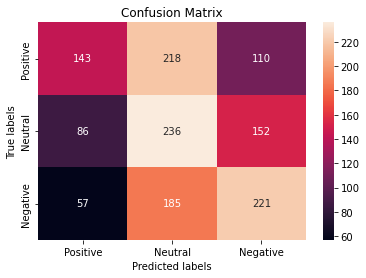

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Neutral', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Neutral', 'Negative']);

In [37]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.5        0.36932707 0.45755694]
recall: [0.30360934 0.4978903  0.47732181]
fscore: [0.37780713 0.42407907 0.46723044]
support: [471 474 463]


In [38]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.30      0.38       471
           1       0.37      0.50      0.42       474
           2       0.46      0.48      0.47       463

    accuracy                           0.43      1408
   macro avg       0.44      0.43      0.42      1408
weighted avg       0.44      0.43      0.42      1408



In [51]:
!pip install --upgrade numpy shap transformers

  Using cached numpy-1.23.4-cp38-cp38-win_amd64.whl (14.7 MB)


In [50]:
import numpy as np
import shap 
import transformers
from transformers import ZeroShotClassificationPipeline
from typin import Union, List

ImportError: cannot import name 'is_tokenizers_available' from 'transformers.utils' (C:\Users\senug\Anaconda3\lib\site-packages\transformers\utils\__init__.py)